In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob
import os

from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
import warnings
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
df = pd.read_csv(r'/content/drive/MyDrive/SMA/data.csv')

In [17]:
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Accor | ALL (Accor Live Limitless),Fairmont Waterfront vs....,1899-12-30 19:31:00,3.5k,67.3k,by Ubud,Ubud,"Raffles, Orient-Express, Faena, Banyan Tree, D..."
1,Choice | Choice Privileges,Choice Privileges Co-brand...,1899-12-30 13:18:00,1.5k,15.1k,by ChoiceHotels,ChoiceHotels,"Comfort Inn, Comfort Suites, Quality, Sleep In..."
2,Expert Hotel Reviews,Corinthia Hotel Lisbon,1899-12-30 08:47:00,421,600,by marcopizzaiuolo,marcopizzaiuolo,Hotel reviews created by FlyerTalk's elite-sta...
3,Hilton | Hilton Honors,Conrad Bangkok {THA},1899-12-30 02:00:00,19.8k,630.6k,by sbams,sbams,"Waldorf-Astoria, Conrad, Hilton, DoubleTree, E..."
4,Hyatt | World of Hyatt,Hyatt Regency Kathmandu...,1899-12-30 02:36:00,13.3k,413.9k,by khabah,khabah,"Alila, Andaz, Alua, breathless, Caption by Hya..."


In [18]:
df.shape

(13, 8)

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Column1  13 non-null     object
 1   Column2  13 non-null     object
 2   Column3  13 non-null     object
 3   Column4  13 non-null     object
 4   Column5  13 non-null     object
 5   Column6  13 non-null     object
 6   Column7  13 non-null     object
 7   Column8  13 non-null     object
dtypes: object(8)
memory usage: 960.0+ bytes


In [24]:
df.isnull().sum()

Column1    0
Column2    0
Column3    0
Column4    0
Column5    0
Column6    0
Column7    0
Column8    0
dtype: int64

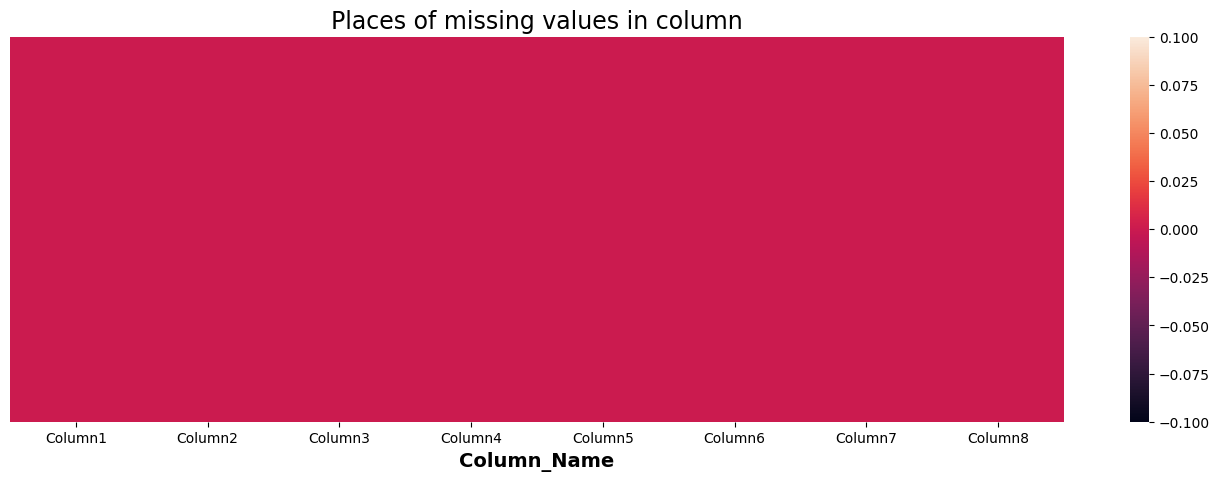

In [23]:
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",size=17)
plt.show()

In [32]:
#Remove unnecessary characters
punct  =  ['%','/',':','\\','&amp','&',';','?','-',',']

def remove_punctuations(text):
  for punctuation in punct:
    text = text.replace(punctuation,'')
  return text

In [33]:
df['Column8'] = df['Column8'].apply(lambda x: remove_punctuations(x))

In [34]:
df['Column8']

0     Raffles OrientExpress Faena Banyan Tree Delano...
1     Comfort Inn Comfort Suites Quality Sleep Inn C...
2     Hotel reviews created by FlyerTalk's elitestat...
3     WaldorfAstoria Conrad Hilton DoubleTree Embass...
4     Alila Andaz Alua breathless Caption by Hyatt D...
5     InterContinental Hotels Group (IHG) with IHG O...
6     Bulgari JW Marriott Edition Autograph Collecti...
7     Mr. and Mrs. Smith hotels and association with...
8     Practices and policies of alternative lodging ...
9     Any hotel chain without a dedicated forum such...
10    Radisson BLU Radisson Park Plaza Park Inn Coun...
11    Small Luxury Hotel properties and association ...
12    Wyndham Hotels  Resorts Wyndham Grand Wyndham ...
Name: Column8, dtype: object

In [35]:
df = df.reset_index(drop=True)
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Accor | ALL (Accor Live Limitless),Fairmont Waterfront vs....,1899-12-30 19:31:00,3.5k,67.3k,by Ubud,Ubud,Raffles OrientExpress Faena Banyan Tree Delano...
1,Choice | Choice Privileges,Choice Privileges Co-brand...,1899-12-30 13:18:00,1.5k,15.1k,by ChoiceHotels,ChoiceHotels,Comfort Inn Comfort Suites Quality Sleep Inn C...
2,Expert Hotel Reviews,Corinthia Hotel Lisbon,1899-12-30 08:47:00,421,600,by marcopizzaiuolo,marcopizzaiuolo,Hotel reviews created by FlyerTalk's elitestat...
3,Hilton | Hilton Honors,Conrad Bangkok {THA},1899-12-30 02:00:00,19.8k,630.6k,by sbams,sbams,WaldorfAstoria Conrad Hilton DoubleTree Embass...
4,Hyatt | World of Hyatt,Hyatt Regency Kathmandu...,1899-12-30 02:36:00,13.3k,413.9k,by khabah,khabah,Alila Andaz Alua breathless Caption by Hyatt D...


In [40]:
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [41]:
df['subjectivity']=df[ 'Column8'].apply(get_subjectivity)
df[ 'polarity' ]=df[ 'Column8'].apply(get_polarity)
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,subjectivity,polarity
0,Accor | ALL (Accor Live Limitless),Fairmont Waterfront vs....,1899-12-30 19:31:00,3.5k,67.3k,by Ubud,Ubud,Raffles OrientExpress Faena Banyan Tree Delano...,1.000000,0.500000
1,Choice | Choice Privileges,Choice Privileges Co-brand...,1899-12-30 13:18:00,1.5k,15.1k,by ChoiceHotels,ChoiceHotels,Comfort Inn Comfort Suites Quality Sleep Inn C...,0.000000,0.000000
2,Expert Hotel Reviews,Corinthia Hotel Lisbon,1899-12-30 08:47:00,421,600,by marcopizzaiuolo,marcopizzaiuolo,Hotel reviews created by FlyerTalk's elitestat...,0.000000,0.000000
3,Hilton | Hilton Honors,Conrad Bangkok {THA},1899-12-30 02:00:00,19.8k,630.6k,by sbams,sbams,WaldorfAstoria Conrad Hilton DoubleTree Embass...,1.000000,0.500000
4,Hyatt | World of Hyatt,Hyatt Regency Kathmandu...,1899-12-30 02:36:00,13.3k,413.9k,by khabah,khabah,Alila Andaz Alua breathless Caption by Hyatt D...,0.616667,0.208333


<Axes: title={'center': 'Sentiment Analysis'}>

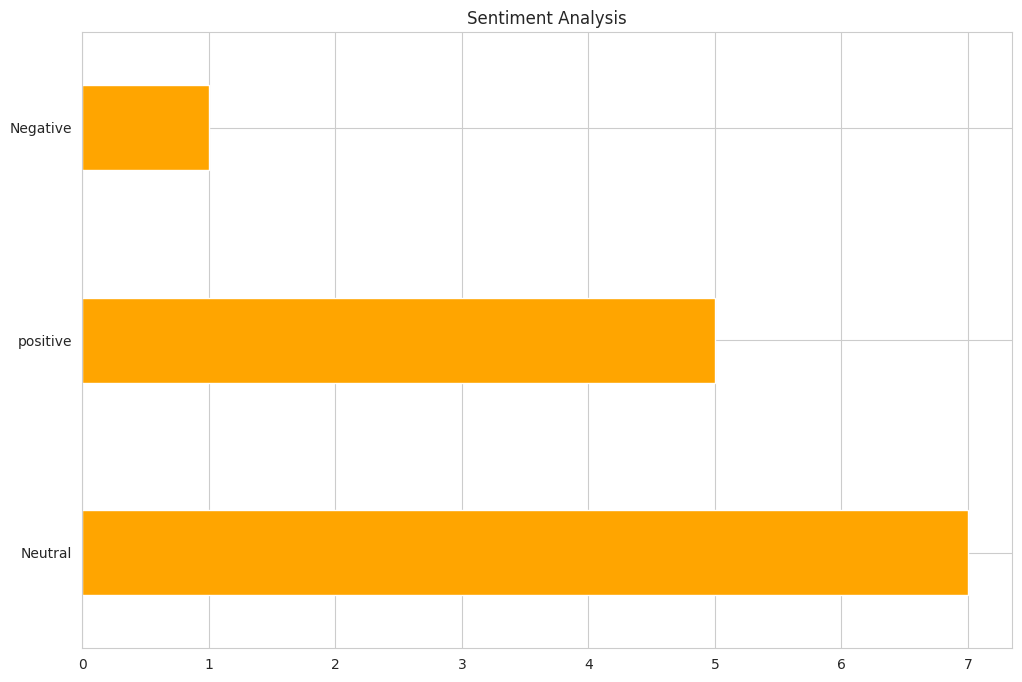

In [67]:
df['textblob_score'] =df['Column8'].apply(lambda x:TextBlob(x).sentiment.polarity)
neutral_threshold=0.05
df['textblob_sentiment']=df['textblob_score'].apply(lambda c:'positive' if c >= neutral_threshold else ('Negative' if c <= -(neutral_threshold) else 'Neutral' ) )
textblob_df = df[['Column8','textblob_sentiment','Column3','polarity','subjectivity']]
textblob_df
textblob_df["textblob_sentiment"].value_counts()
textblob_df["textblob_sentiment"].value_counts().plot.barh(title = 'Sentiment Analysis',color='orange' , width=.4, figsize=(12,8),stacked = True)

In [68]:
df_positive=textblob_df[textblob_df['textblob_sentiment']=='positive' ]
df_very_positive=df_positive[df_positive['subjectivity']>0.5]
df_very_positive.head()
df_negative=textblob_df[textblob_df['textblob_sentiment']=='Negative' ]
df_negative
df_neutral=textblob_df[textblob_df['textblob_sentiment']=='Neutral' ]
df_neutral


,Column8,textblob_sentiment,Column3,polarity,subjectivity
1,Comfort Inn Comfort Suites Quality Sleep Inn C...,Neutral,1899-12-30 13:18:00,0.0,0.0000
2,Hotel reviews created by FlyerTalk's elitestat...,Neutral,1899-12-30 08:47:00,0.0,0.0000
6,Bulgari JW Marriott Edition Autograph Collecti...,Neutral,1899-12-30 02:45:00,0.0,0.0000
7,Mr. and Mrs. Smith hotels and association with...,Neutral,1899-12-30 22:19:00,0.0,0.0000
8,Practices and policies of alternative lodging ...,Neutral,1899-12-30 01:50:00,0.0,0.3125
9,Any hotel chain without a dedicated forum such...,Neutral,1899-12-30 05:53:00,0.0,0.2500
10,Radisson BLU Radisson Park Plaza Park Inn Coun...,Neutral,1899-12-30 11:27:00,0.0,0.0000
